In [170]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data1 = pd.read_excel("result_data.xlsx",sheet_name="simutime")
data2 = pd.read_excel("result_data.xlsx",sheet_name="homo")
data3 = pd.read_excel("result_data.xlsx",sheet_name="heter")

In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

In [ ]:
a0pos = aaa[0]['Time'].to_numpy()[np.where(aaa[0]['Server1 Queue']==0)[0]]
b0pos = bbb[0]['Time'].to_numpy()[np.where(bbb[0]['Server1 Queue']==0)[0]]
data = [a0pos, b0pos]
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)
ax.set_yticklabels(['Stable system', 'Unstable system'])
ax.set_xlabel('Simulation Time')
ax.set_title('boxplot example')
plt.show()

How long is long?

In [395]:
s1d = 39
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,policy="jsq1")
#bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=6000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(aaa,ccc)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [190]:
def yyy(system1):
    
    bbb = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()

    plt.plot(bbb['Time'],sys1_timing['cma'],label='jsq1')
    #plt.title('Warm up period')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()

In [ ]:
yyy(aaa)

In [337]:
s1d = 30
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jiq1')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jsq1')
fff = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=4000,simuseed=s1d)

In [ ]:
system_compare(fff,eee)

In [ ]:
fff[8]

In [342]:
stats.ttest_rel(data1['jsq_2000'], data1['jsq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [343]:
stats.ttest_rel(data1['jiq_2000'], data1['jiq_4000'])

Ttest_relResult(statistic=0.46367188623859523, pvalue=0.6454603855924186)

In [344]:
stats.ttest_rel(data1['jswq_2000'], data1['jswq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [345]:
stats.ttest_rel(data1['dos_2000'], data1['dos_4000'])

Ttest_relResult(statistic=-0.7595495376631464, pvalue=0.45209084262645827)

In [346]:
stats.ttest_rel(data1['doc_2000'], data1['doc_4000'])

Ttest_relResult(statistic=-0.2864186565457613, pvalue=0.7760735547786916)

Stability Analysis

In [ ]:
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)

Homo

In [831]:
s1d = 13
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(ccc,ddd)

In [ ]:
ccc[8]

Hetero

In [458]:
scl_inc = [weibull_scale_calculator(1/1.5,2),weibull_scale_calculator(1/2,2),\
           weibull_scale_calculator(1/4,2),weibull_scale_calculator(1/1,2)]

scl_dec = [weibull_scale_calculator(1/1.5,0.5),weibull_scale_calculator(1/2,0.5),\
           weibull_scale_calculator(1/4,0.5),weibull_scale_calculator(1/1,0.5)]

In [750]:
s1d = 40
aaa = mmn_queueing_jsq_weibull(4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,scl_dec,0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d,policy='jsq2')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,simuseed=s1d,policy='jsq1')
#fff = mmn_queueing_redundancy_dos_identical(4,4,8,[1.5,2,4,1],simulation_time=2000,simuseed=s1d)

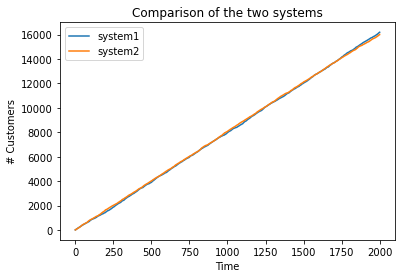

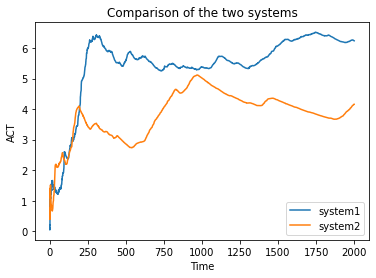

In [751]:
system_compare(aaa,bbb)

In [752]:
aaa[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.076701,0.076701,0.168129,1.0,0.091428,0.091428
2,2.0,0.339533,0.339533,0.340344,2.0,0.000811,0.046119
3,3.0,0.374710,0.374710,0.676457,3.0,0.301746,0.131328
4,4.0,0.391885,0.391885,0.449244,4.0,0.057360,0.112836
5,5.0,0.432448,0.432448,0.551839,1.0,0.119391,0.114147
...,...,...,...,...,...,...,...
16196,16196.0,1998.325059,1998.809558,1998.844309,3.0,0.519250,6.235636
16198,16198.0,1998.490389,1998.844309,1998.869772,3.0,0.379383,6.235274
16199,16199.0,1998.677165,1999.636915,1999.757688,2.0,1.080523,6.234956
16200,16200.0,1998.699755,1999.757688,1999.824755,2.0,1.125000,6.234640


In [753]:
bbb[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.076701,0.076701,0.821978,4.0,0.745277,0.745277
2,2.0,0.339533,0.339533,0.372344,2.0,0.032812,0.389044
3,3.0,0.374710,0.374710,1.113319,3.0,0.738608,0.505566
4,4.0,0.782796,0.782796,4.703402,2.0,3.920605,1.359326
5,5.0,0.811683,0.811683,0.904644,1.0,0.092961,1.106053
...,...,...,...,...,...,...,...
16008,16008.0,1989.005576,1997.381208,1997.415154,3.0,8.409578,4.156184
16009,16009.0,1989.056705,1997.415154,1997.416689,3.0,8.359984,4.156446
16010,16010.0,1989.101097,1997.416689,1997.416866,3.0,8.315769,4.156706
16011,16011.0,1989.535383,1997.416866,1997.663288,3.0,8.127905,4.156954
